In [1]:
# https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
# https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/salary.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/salary.csv"
df = pd.read_csv(file_url, skipinitialspace=True)

In [3]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
# age: 연령
# education-num : 교육년수
# capital-gain : 자산 증가량
# capital-loss : 자산 감소량
# hours-per-week : 주당 노동 시간
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# [범주형 변수]
# workclass : 고용 형태
# education : 학력
# marital-status : 결혼 상태
# occupation : 직업
# relationship : 가족관계
# race : 인종
# sex : 성별
# native-country : 출신국가
# class : 연봉 범위
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [7]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


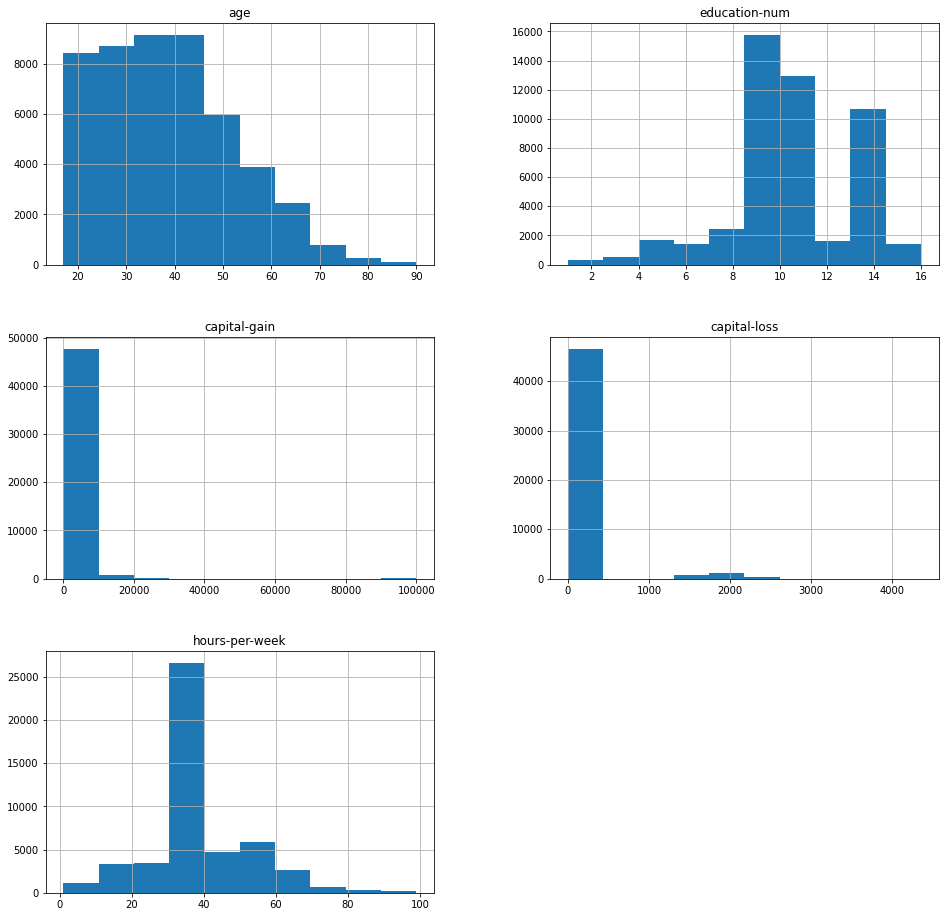

In [8]:
h = df.hist(figsize=(16, 16))

# 전처리

In [9]:
df['class']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: object

In [10]:
df['class'].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

In [11]:
df['class'] = df['class'].map({'<=50K': 0, '>50K': 1})
df['class']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [12]:
df['class'].value_counts()

0    37155
1    11687
Name: class, dtype: int64

In [13]:
df['age'].dtype

dtype('int64')

In [14]:
obj_list = []
for c in df.columns:
  if df[c].dtype == 'object':
    obj_list.append(c)
    #print(c, df[c].dtype)
print(obj_list)

# [for c in df.columns]
obj_list2 = [c for c in df.columns if df[c].dtype == 'object']
print(obj_list2)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [15]:
for o in obj_list:
    print(o, df[o].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [16]:
# 1. 연속형 변수? <- 1, 2, 3... Group의 평균, 최빈값
# 2. drop?
# 3. dummies?

for o in obj_list:
    if df[o].nunique() > 10:
        print(o, df[o].nunique())

education 16
occupation 14
native-country 41


In [17]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [18]:
df['education-num']

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: education-num, Length: 48842, dtype: int64

In [19]:
for n in range(1, 17): # 1~16
    # print(df[df['education-num'] == n]['education'])
    # print(df[df['education-num'] == n].education.nunique())
    print(df[df['education-num'] == n].education.nunique() == 1)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [20]:
df.drop('education', axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education-num   48842 non-null  int64 
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  47985 non-null  object
 12  class           48842 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.8+ MB


In [22]:
# 데이터는 이미 묶여있고, 직업이라는 데이터 특성상 연봉에 큰 영향을 줄것이라 예상 
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [23]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [24]:
# groupby(묶고 싶은 열 이름)[특정한 열 이름].적용하고자 하는 그룹함수
# df.groupby('native-country')['class'].mean()
df.groupby('native-country')['class'].mean().sort_values(ascending=False)

native-country
France                        0.421053
India                         0.410596
Taiwan                        0.400000
Iran                          0.372881
England                       0.370079
Greece                        0.367347
Yugoslavia                    0.347826
Japan                         0.347826
Canada                        0.346154
Italy                         0.323810
Cambodia                      0.321429
Hungary                       0.315789
Ireland                       0.297297
China                         0.295082
Philippines                   0.288136
Germany                       0.281553
Hong                          0.266667
Cuba                          0.246377
United-States                 0.243977
Poland                        0.195402
Portugal                      0.179104
South                         0.173913
Thailand                      0.166667
Scotland                      0.142857
Jamaica                       0.141509
Ecuador   

In [25]:
# df[df['native-country'] == 'France'].groupby('occupation')['class']
df[df['native-country'] == 'France'].groupby('occupation')['class'].mean()

occupation
Adm-clerical       0.666667
Craft-repair       0.000000
Exec-managerial    0.555556
Farming-fishing    0.000000
Other-service      0.000000
Priv-house-serv    0.000000
Prof-specialty     0.272727
Protective-serv    1.000000
Sales              1.000000
Tech-support       0.750000
Name: class, dtype: float64

In [26]:
country_group = df.groupby('native-country').mean()['class']
country_group

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

In [27]:
country_group.index

Index(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
       'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong',
       'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South',
       'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'],
      dtype='object', name='native-country')

In [28]:
country_group = country_group.reset_index()
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [29]:
# A.merge(B)  A 왼쪽 B 오른쪽
# A 라고 하는 쪽 결측치가 있을 수도 있음
# A를 모두 보존해주는 방향으로 -> B가 없어도 괜찮아 (country_group.class) -> how='left'
df = df.merge(country_group, on ='native-country', how='left')
df


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


In [30]:
# df.groupby(['native-country']).mean()[['class_x', 'age']].sort_values(by='age', ascending=False)['class_x']

1.전처리 중 
2. 범주형 변수처리 (drop? 연속형변수로 변환? dummies? 대체값으로 대입?) <br>
/ 결측치 / (스케일링 을 통한 아웃라이어(이상치)는 신경x <- 알고리즘이 결정트리
2.1 education : education-num -> drop
2.2 occupation : 이미 묶여있고 중요할거 같아 -> dummies
2.3 native-country : 출신국가 결정트리이기에 고연봉자 비율정도로만 처리해도 괜찮을듯

In [31]:
# df['country_class_mean'] = df.groupby('native-country')['class'].transform('mean')
# class x, class y
df.drop('native-country', axis=1, inplace=True)
df = df.rename(columns={'class_x': 'class', 'class_y': 'native-country'})
df


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.243977


# 결측치 처리 & 더미변수 변환


In [32]:
df.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

## 임의값 넣어주기

In [33]:
df['native-country'].fillna(-99, inplace=True)
df.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.000000
dtype: float64

In [34]:
df['workclass'].value_counts() / len(df)

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

In [35]:
df['workclass'].fillna('Private', inplace=True)
df.isna().mean()

age               0.000000
workclass         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.000000
dtype: float64

In [36]:
df['occupation'].value_counts() / len(df)

Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
Transport-moving     0.048217
Handlers-cleaners    0.042423
Farming-fishing      0.030507
Tech-support         0.029606
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: occupation, dtype: float64

In [37]:
df['occupation'].fillna('Unknown', inplace=True)
df.isna().mean()

age               0.0
workclass         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
class             0.0
native-country    0.0
dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education-num   48842 non-null  int64  
 3   marital-status  48842 non-null  object 
 4   occupation      48842 non-null  object 
 5   relationship    48842 non-null  object 
 6   race            48842 non-null  object 
 7   sex             48842 non-null  object 
 8   capital-gain    48842 non-null  int64  
 9   capital-loss    48842 non-null  int64  
 10  hours-per-week  48842 non-null  int64  
 11  class           48842 non-null  int64  
 12  native-country  48842 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 5.2+ MB


In [39]:
df2 = pd.get_dummies(df, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   48842 non-null  int64  
 1   education-num                         48842 non-null  int64  
 2   capital-gain                          48842 non-null  int64  
 3   capital-loss                          48842 non-null  int64  
 4   hours-per-week                        48842 non-null  int64  
 5   class                                 48842 non-null  int64  
 6   native-country                        48842 non-null  float64
 7   workclass_Local-gov                   48842 non-null  uint8  
 8   workclass_Never-worked                48842 non-null  uint8  
 9   workclass_Private                     48842 non-null  uint8  
 10  workclass_Self-emp-inc                48842 non-null  uint8  
 11  workclass_Self-

# 모델링 & 평가

## 훈련셋 & 시험셋 분리

In [40]:
from sklearn.model_selection import train_test_split
X = df2.drop('class', axis=1)
y = df2['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=100
)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [43]:
pred

array([1, 0, 0, ..., 1, 0, 1])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8154271382504991

## 하이퍼 파라미터 튜닝

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)         # 훈련데이터를 통한 모델학습
train_pred = model.predict(X_train) # 훈련데이터로 모델을 통해서 예측한 값
test_pred = model.predict(X_test)   # 시험데이터로 모델을 통해서 예측한 값
# 기출문제를 풀어서 나온 답 97%
print('Train Score:', accuracy_score(y_train, train_pred)) 
print('Test Score:', accuracy_score(y_test, test_pred))

Train Score: 0.9780242279474493
Test Score: 0.8145569944208425


In [50]:
# 깊이를 제한했더니 학습이 덜 되면서 오히려 새로운 데이터에 대한 예측력 상승
model = DecisionTreeClassifier(max_depth=5, random_state=100)
model.fit(X_train, y_train)         
train_pred = model.predict(X_train) 
test_pred = model.predict(X_test)    

print('Train Score:', accuracy_score(y_train, train_pred)) 
print('Test Score:', accuracy_score(y_test, test_pred))

Train Score: 0.8540180856509129
Test Score: 0.850028151712136


## 트리가 깊어지면 오버피팅 문제가 난다
* 기본값(결정 트리)의 설정은 구분되는 것까지 가장 깊은 
노드값까지 탐색해서 내려갑니다
* 오버피팅(과최적화) : 학습니 너무 잘되서 새로운 데이터에 대한 예측력이 오히려 떨어지는 상황

In [ ]:
def test_depth(depth: int):
    model = DecisionTreeClassifier(max_depth=depth, random_state=100)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(f'**{depth}**')
    print('Train score:', accuracy_score(y_train, train_pred))
    print('Test score:', accuracy_score(y_test, test_pred))

# [test_depth(d) for d in range(1, 20)]
for d in range(1, 20):
  test_depth(d)

# 트리 그래프

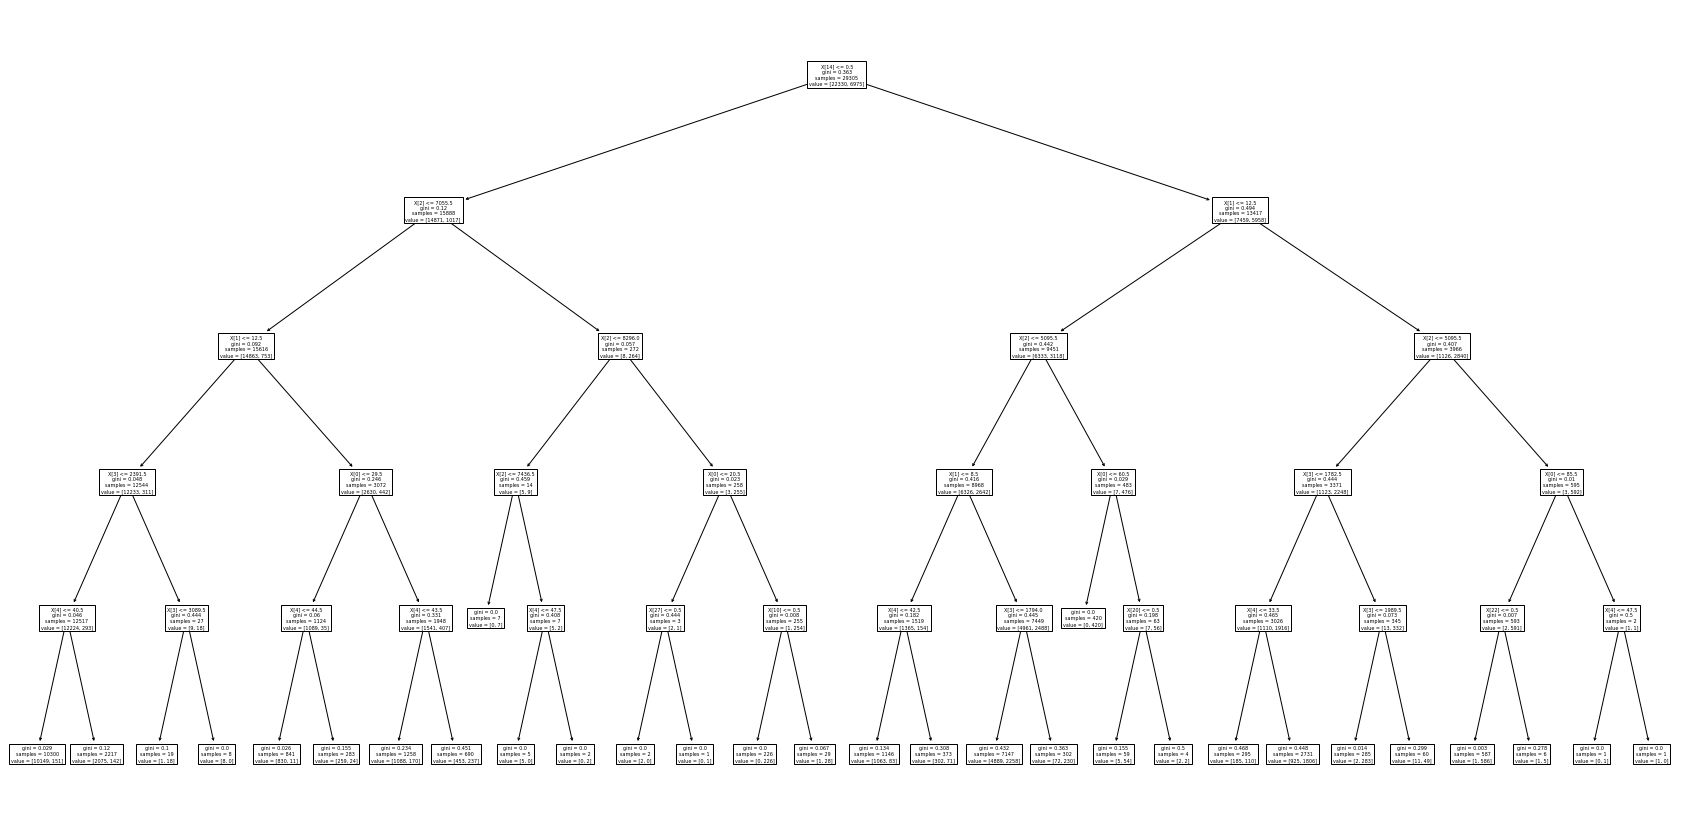

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15)) # 그래프 크기결정
plot_tree(model)
plt.show()

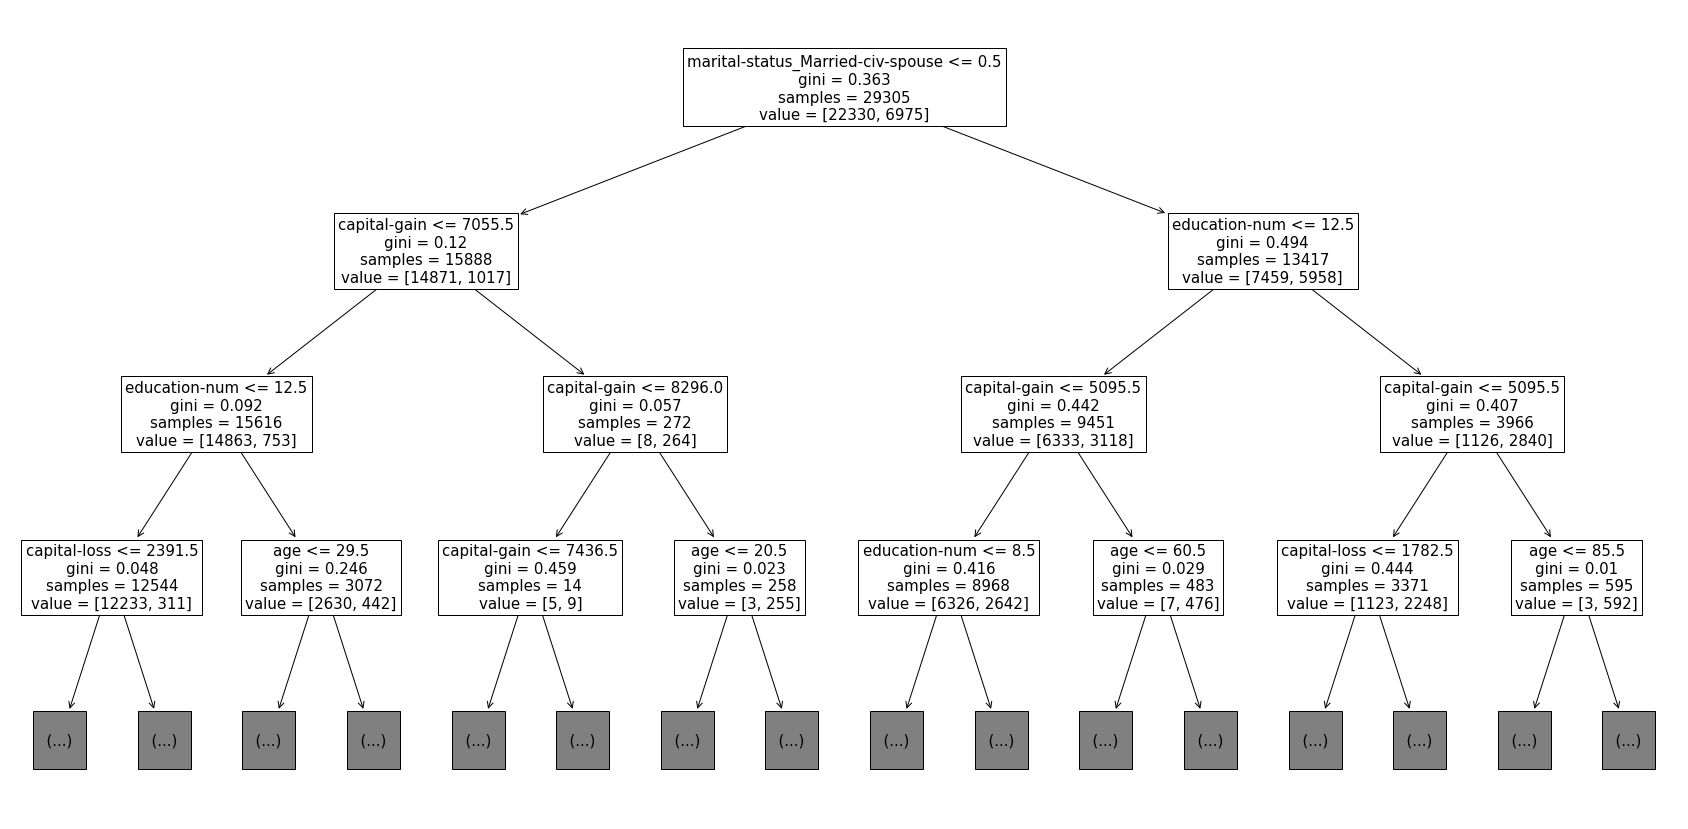

In [54]:
plt.figure(figsize=(30,15))
plot_tree(model, max_depth = 3, fontsize=15, feature_names=X_train.columns)
plt.show()